# Run fishnet_generator and hru_parameters

#### This notebook runs the GsflowArcpy scripts to build a rectangular model grid and stores the grid in the hru_params.shp file.

In [1]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
import arcpy
import geopandas
import matplotlib.image as mpimg
import ConfigParser
from matplotlib import cm
from arcpy import env
python_exe = sys.executable
sys.path.insert(0,"..\scripts")


In [2]:
# Set folder locations
arc_gsflow_folder= os.path.abspath(r"..\scripts")
config_file_folder=os.path.abspath(r"..\examples\sagehen")
ini_file = "..\examples\sagehen\sagehen_parameters_orig.ini"

#### GsflowArcpy uses a configuration file to set variables required by the scripts. Below the configuration file template is read, and default values are changed and written to the configuration file (".INI") read by GsflowArcpy.

In [3]:
# Load GsflowArcpy configuration file
Config = ConfigParser.ConfigParser()
Config.read(os.path.abspath(ini_file))

['D:\\Workspace\\classes\\gsflowID2447_classrepo\\exercises\\saghen_prms\\examples\\sagehen\\sagehen_parameters_orig.ini']

In [4]:
# Set variable values for scripts
hru_cellsize = 90
hru_fishnet_path = os.path.abspath(r"..\examples\sagehen\hru_params\hru_params.shp")
hru_centroid_path = os.path.abspath(r"..\examples\sagehen\hru_params\hru_params_label.shp")
hru_ref_x = 0
hru_ref_y = 0
hru_param_snap_method = 'EXPAND'
hru_buffer_cells = 2
# Remap files 
remap_folder = os.path.abspath(r"..\remaps")
aspect_remap = os.path.abspath("aspect.rmp")
single_param_file_flag = False
# single_param_file_name = prms_inputs.param
param_column_flag = True
# Default/template values
prms_dimen_csv_path = os.path.abspath(r"..\examples\sagehen\hru_params\prms_dimensions.csv")
prms_param_csv_path = os.path.abspath(r"..\examples\sagehen\hru_params\prms_parameters.csv")
## Miscellaneous
# Scratch Workspace ('in_memory' or 'scratch')
# in_memory may not work for computers with limited RAM
# scratch will write all intermediate files to a scratch folder on the disk
scratch_name = "in_memory"
# scratch_name = scratch
# Scale floating point values before converting to Int and calculating Median
int_factor = 1
# Don't change this unless it conflicts with an existing field
orig_fid_field = "ORIG_FID"

In [5]:
# Write out modified values to configuration file
cfgfile = open("..\examples\sagehen\sagehen_parameters.ini",'w')
Config.set('INPUTS','hru_cellsize',hru_cellsize)
Config.set('INPUTS','hru_fishnet_path',hru_fishnet_path)
Config.set('INPUTS','hru_centroid_path',hru_centroid_path)
Config.set('INPUTS','hru_ref_x',hru_ref_x)
Config.set('INPUTS','hru_ref_y',hru_ref_y)
Config.set('INPUTS','hru_param_snap_method',hru_param_snap_method)
Config.set('INPUTS','hru_buffer_cells',hru_buffer_cells)
Config.set('INPUTS','remap_folder',remap_folder)
Config.set('INPUTS','aspect_remap',aspect_remap)
Config.set('INPUTS','single_param_file_flag',single_param_file_flag)
Config.set('INPUTS','param_column_flag',param_column_flag)
Config.set('INPUTS','prms_dimen_csv_path',prms_dimen_csv_path)
Config.set('INPUTS','prms_param_csv_path',prms_param_csv_path)
Config.set('INPUTS','scratch_name',scratch_name)
Config.set('INPUTS','int_factor',int_factor)
Config.set('INPUTS','orig_fid_field',orig_fid_field)
Config.write(cfgfile)
cfgfile.close()

#### Run the GsflowArpcy scripts fishnet_generator and hru_parameters.

In [6]:
%run ../scripts/fishnet_generator.py -i ../examples/sagehen/sagehen_parameters.ini
if 0:
    # Set and run fishnet_generator script
    script = r"fishnet_generator.py"
    argument = r" -i ..\examples\sagehen\sagehen_parameters.ini"
    os.chdir(arc_gsflow_folder)
    cmd=python_exe + " " + script
    cmd = cmd + argument
    os.system(cmd)


################################################################################
Run Time Stamp:      2019-09-06 12:36:11.337000
Current Directory:   D:\Workspace\classes\gsflowID2447_classrepo\exercises\saghen_prms\notebook
Script:              fishnet_generator.py

GSFLOW Fishnet Generator

Fishnet Parameters
  Cellsize:      90.0
  Snap point:    0.0 0.0
  Study Area extent: 214336.751937632 4366846.43250545 221479.672330508 4373311.76361205
  Buffered Extent:   214156.751937632 4366666.43250545 221659.672330508 4373491.76361205
  Snapped Extent:    214110 4366620 221670 4373550

Building HRU parameter fishnet


In [7]:
# Set and run hru_parameters script
%run ../scripts/hru_parameters.py -i ../examples/sagehen/sagehen_parameters.ini


################################################################################
Run Time Stamp:      2019-09-06 12:36:23.963000
Current Directory:   D:\Workspace\classes\gsflowID2447_classrepo\exercises\saghen_prms\notebook
Script:              hru_parameters.py

GSFLOW HRU Parameters
  Missing INI parameter, setting calc_topo_index_flag = False

Adding fields if necessary
  Note: You may see duplicate field names when writing to a network drive
  Field: ORIG_FID
  Field: HRU_ID
  Field: HRU_TYPE
  Field: DEM_MEAN
  Field: DEM_MIN
  Field: DEM_MAX
  Field: DEM_ADJ
  Field: DEM_FLOWAC
  Field: DEM_SUM
  Field: DEM_COUNT
  Field: DEM_SINK
  Field: CRT_ELEV
  Field: CRT_FILL
  Field: DEM_ASPECT
  Field: DEM_SLP_D
  Field: DEM_SLP_R
  Field: DEM_SLP_P
  Field: HRU_AREA
  Field: HRU_ROW
  Field: HRU_COL
  Field: HRU_X
  Field: HRU_Y
  Field: HRU_LAT
  Field: HRU_LON
  Field: LAKE_ID
  Field: LAKE_AREA
  Field: ISEG
  Field: IRUNBOUND
  Field: FLOW_DIR
  Field: KRCH
  Field: IRCH
  Field: 

In [8]:
# Set and run hru_parameters script
if 0:
    script = r"hru_parameters.py"
    cmd=python_exe + " " + os.path.join(arc_gsflow_folder,script)
    cmd = cmd + argument
    os.system(cmd)

#### The model grid and boundary are shown below.

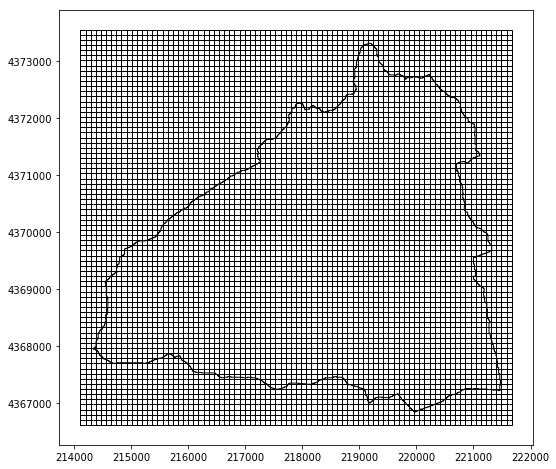

In [8]:
# Plot model grid and model boundary
fig, ax = plt.subplots(figsize=(20,8))
fn1=r"..\examples\sagehen\shapefiles\watershed_proj.shp"
fn2=r"..\examples\sagehen\hru_params\hru_params.shp"
boundary=geopandas.read_file(fn1)
grid=geopandas.read_file(fn2)
grid.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
boundary.plot(ax=ax,color='none', edgecolor='black', linewidth=1.0)
plt.show()